**This file contains a development of An ARABIC OCR on some car plats**  

---





1.  Link it to a drive directory

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 **Install needed librairies**

In [ ]:
!pip install ArabicOcr
pip uninstall opencv-python-headless



In [ ]:
pip install opencv-python-headless==4.1.2.30


2. Give your cars plats' numbers

In [ ]:
# Here is it the car plats wanted
# if " NT car then the number is wrote with one value"
# in the other case in which it is tunisian one then two number 0:the left / 1:the right


plats=[(2180,131),12345]


3. take a picture of a plat

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='/content/drive/My Drive/ooo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('/content/drive/My Drive/ooo.jpg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to /content/drive/My Drive/ooo.jpg


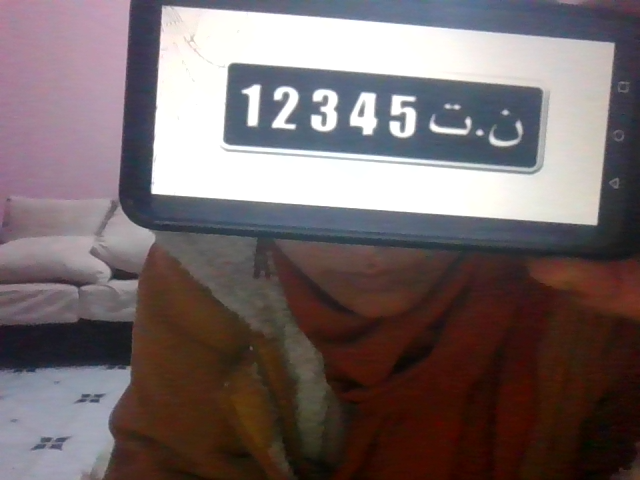

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
from ArabicOcr import arabicocr
image_path="/content/drive/My Drive/ooo.jpg"
out_image="/content/drive/My Drive/out1.jpg"
results=arabicocr.arabic_ocr(image_path,out_image)
print(results)
words=[]
for i in range(len(results)):
		word=results[i][1]
		words.append(word)
with open ('file.txt','w',encoding='utf-8')as myfile:
		myfile.write(str(words))

Using CPU. Note: This module is much faster with a GPU.


[INFO] OCR'ing input image...
[INFO] 0.9997: 12345
[INFO] 0.3508: ن ت
[[[[229, 72], [434, 72], [434, 150], [229, 150]], '12345', 0.9997163753323188], [[[427.9632031319513, 89.09025785212212], [533.810957595581, 108.50575376113629], [523.0367968680488, 157.9097421478779], [417.1890424044189, 138.49424623886372]], 'ن ت', 0.350822008352253]]


In [ ]:
 def check(value):
  if value in plats :
    print("CODE SCANNÉ : Vous pouvez enter ! ")
  else :
    print("CODE SCANNÉ :  Mais désolé Vous ne pouvez pas enter ! ")

In [ ]:
t=[int(s) for s in words[0].split() if s.isdigit()]

In [ ]:
if  len(t)==1 :
    check(t[0])
else :
   check ((t[0],t[1]))

CODE SCANNÉ : Vous pouvez enter ! 
